# Sample Assessment Geo Data Science

## Abstract

Over the last years, remote sensing has developed satellite sensors to collect high spatial and temporal resolution images from Earth's surface generating large data and new opportunities for developing methods to access and analyse this data, as Earth observation data cubes. With data cubes it is possible to analyse the Earth's surface over temporal and spatial attributes and allows the extraction of Land Use and Land Cover (LULC) features and patterns to map land use changes. This also provides an extensive mass of historical data about phenology and years of image time series [[1]](./README.md#References). Soon, this historical data can be useful for training deep learning algorithms based on temporal and spatial dimensions. The paper [[1]](./README.md#References) demonstrated how this historical data can be used to generate LULC samples using Time-Weighted Dynamic Time Warping (TWDTW). As demonstrated in [[2]](./README.md#References) the current ways to classify land use and land cover maps like Random Forest and Support Vector Machines (SVM) algorithms have been successfully applied to the LULC change classification. However these algorithms do not use the temporal dimension, an important characteristic in data cubes, in the classification process, resulting in lost data. In other words, the order of the images does not influence the results. The approach presented by the paper [[2]](./README.md#References) proposed a comprehensive study of Temporal Convolutional Neural Networks (TempCNNs), an in-depth approach that applies convolutions in the temporal dimension to automatically learn temporal and spectral features. The study presented by [[3]](./README.md#References) demonstrates the good quality of TempCNN to accurately map LULC without over-representation of majority classes using TempCNN. This approach aims to present a study about remote sensing time series features extraction using TempCNN to LULC classification to estimate the probability of LULC class based on deep learning algorithms in order to contribute to LULC sample generation over the Brazilian Biomes territory. This approach will use the Brazil Data Cube infrastructure to collect data and analyse them. To estimate the probability of LULC classes, this study will use an active learning method, a stored model that will predict the class of unlabeled data based on labeled data and stored, as an oracle. This study also seeks to demonstrate a comparison between the temporal based Neural Networks as TempCNN, non-temporal based like CNN and the current methods as the Random Forest and SVM Algorithm.

**Aprendizado por Reforço**

In [2]:
source("./R/utils.R")
citation("sits")


To cite SITS in publications use:

  Rolf Simoes, Gilberto Camara, Felipe Souza, Pedro Andrade, Lorena
  Santos, Karine Ferreira, Gilberto Queiroz, Alexandre Carvalho, Victor
  Maus (2021), SITS: Data Analysis and Machine Learning using Satellite
  Image Time Series. URL https://github.com/e-sensing/sits.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {sits: Data Analysis and Machine Learning using Satellite Image Time Series},
    author = {Rolf Simoes and Gilberto Camara and Felipe Souza and Pedro Andrade and Lorena Santos and Karine Ferreira and Gilberto Queiroz and Alexandre Ywata {de Carvalho} and Victor Maus},
    organization = {INPE - Brazilian National Institute for Space Research},
    address = {Sao Jose dos Campos, Brazil},
    year = {2021},
    url = {https://github.com/e-sensing/sits},
  }


In [3]:
samples <- read_file.tb("./data/samples/samples_amazonia.rda", "rda")
dplyr::select(head(samples, 4), -time_series)

longitude latitude   start_date end_date   label         cube           
1 -64.69448  -9.986312 2018-07-28 2019-07-28 Deforestation sentinel-077095
2 -64.62979  -9.996668 2018-07-28 2019-07-28 Deforestation sentinel-077095
3 -64.52163  -9.979772 2018-07-28 2019-07-28 Deforestation sentinel-077095
4 -64.52049 -10.003682 2018-07-28 2019-07-28 Deforestation sentinel-077095

In [4]:
sits_labels_summary(samples)

label         count prop     
1 Deforestation 157   0.1306156
2 Forest        414   0.3444260
3 NatNonForest  171   0.1422629
4 Pasture       460   0.3826955

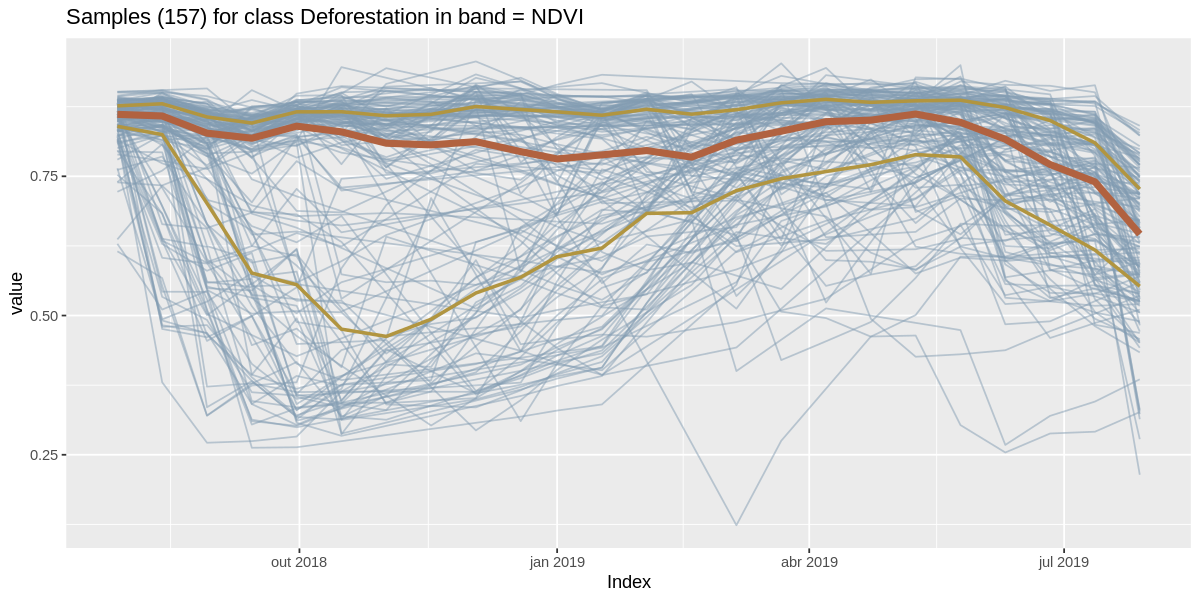

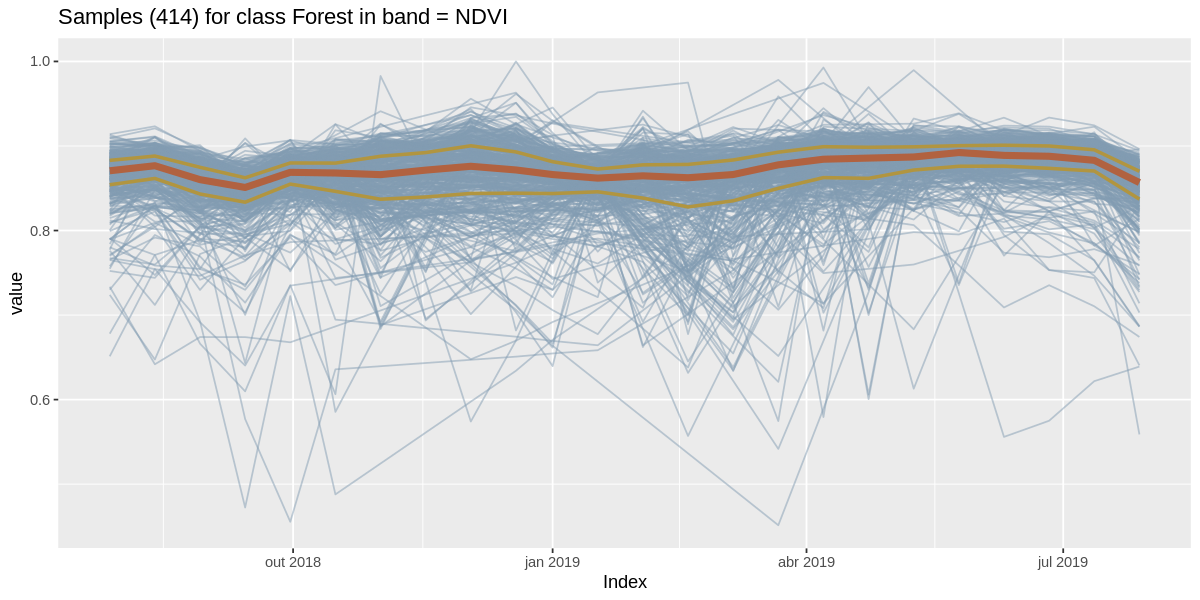

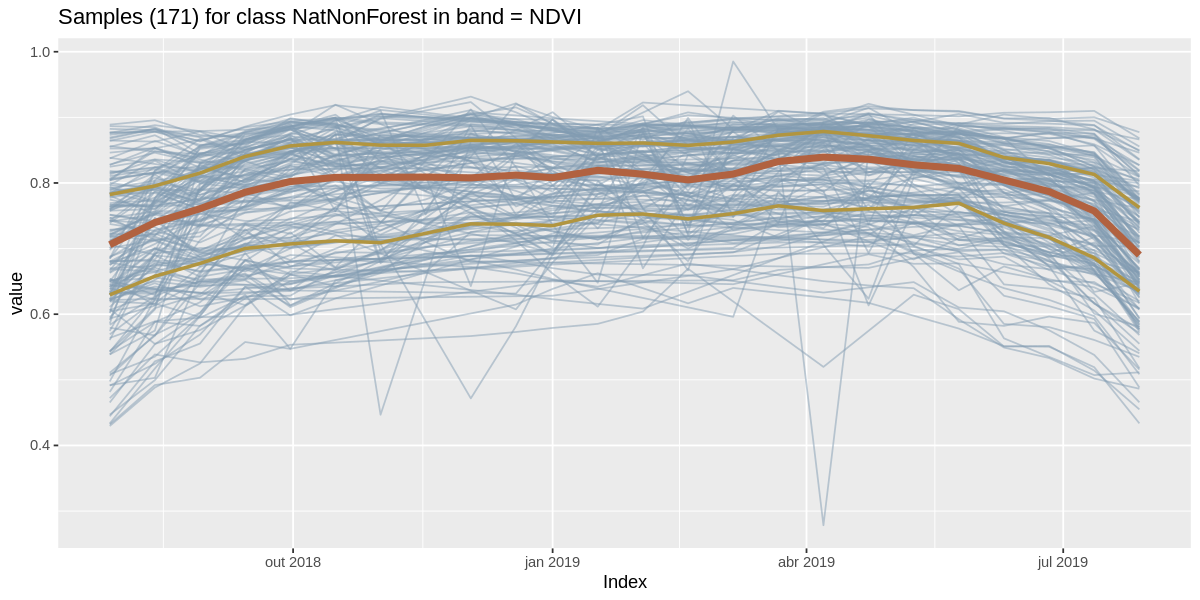

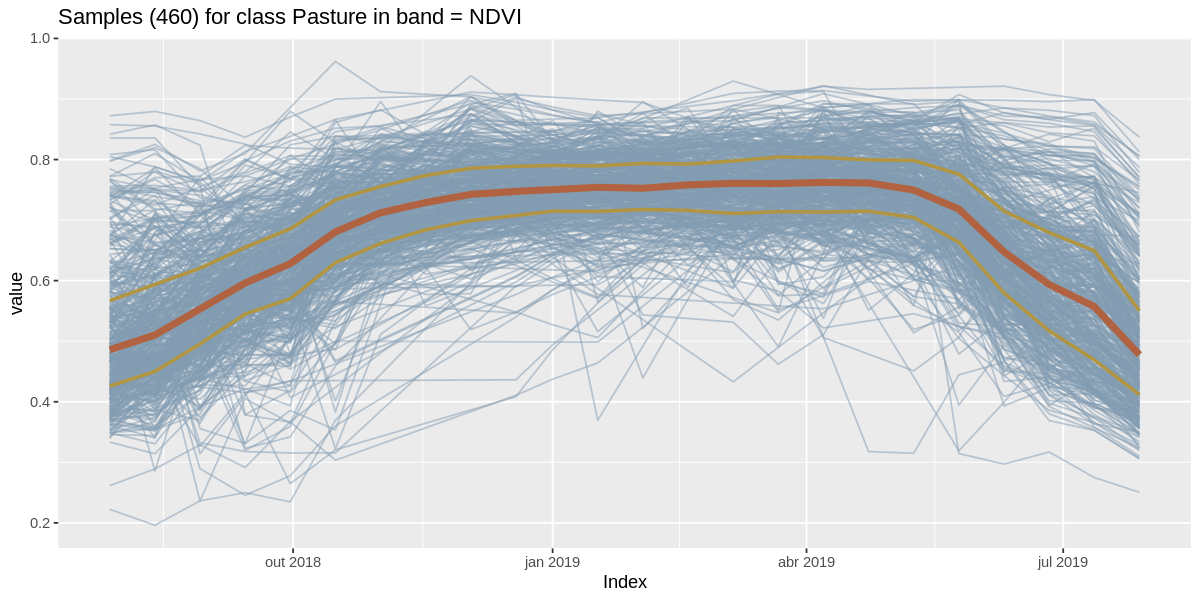

In [5]:
options(repr.plot.width = 10, repr.plot.height = 5)
plot(sits_select(samples, bands = "NDVI"))

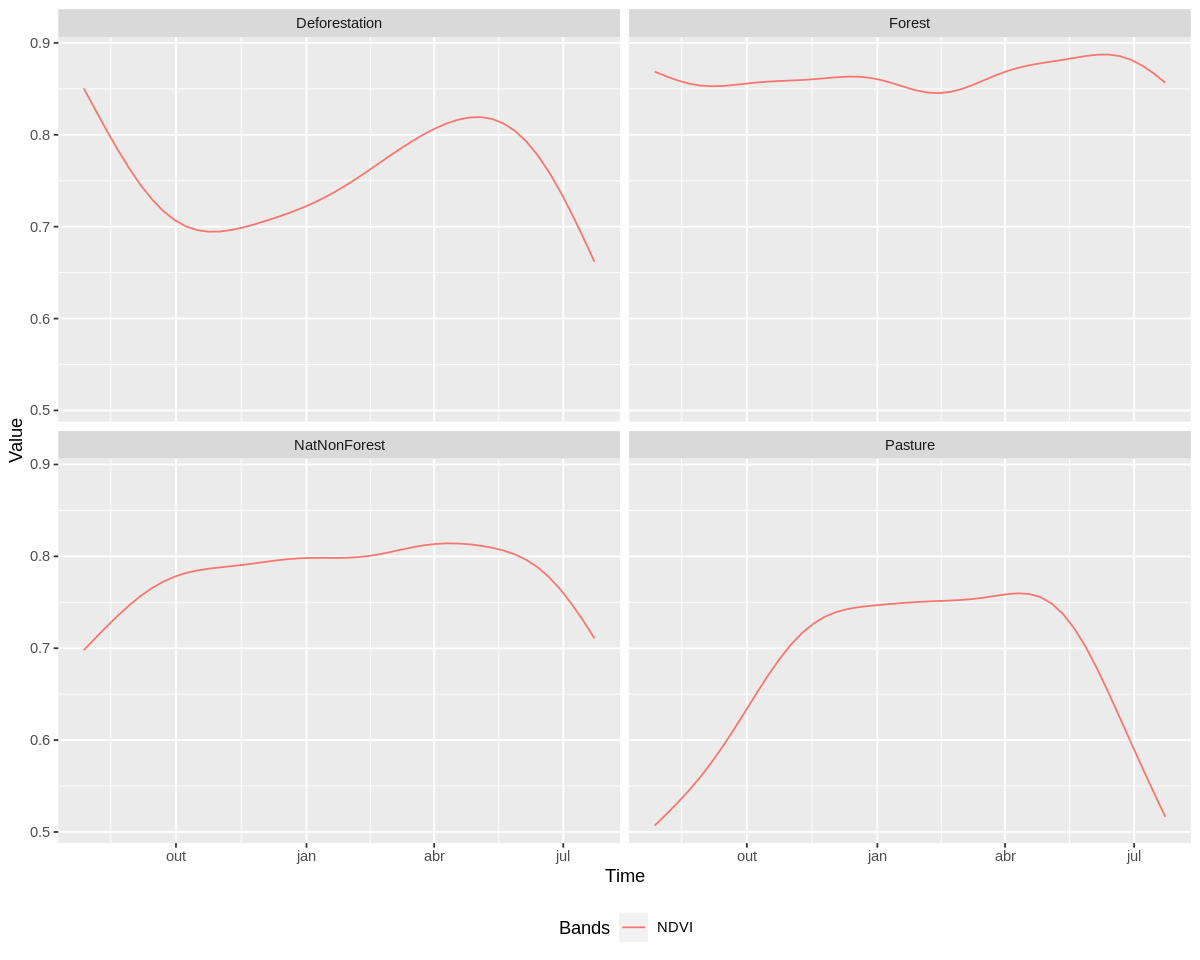

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)
plot(sits_patterns(sits_select(samples, bands = "NDVI")))

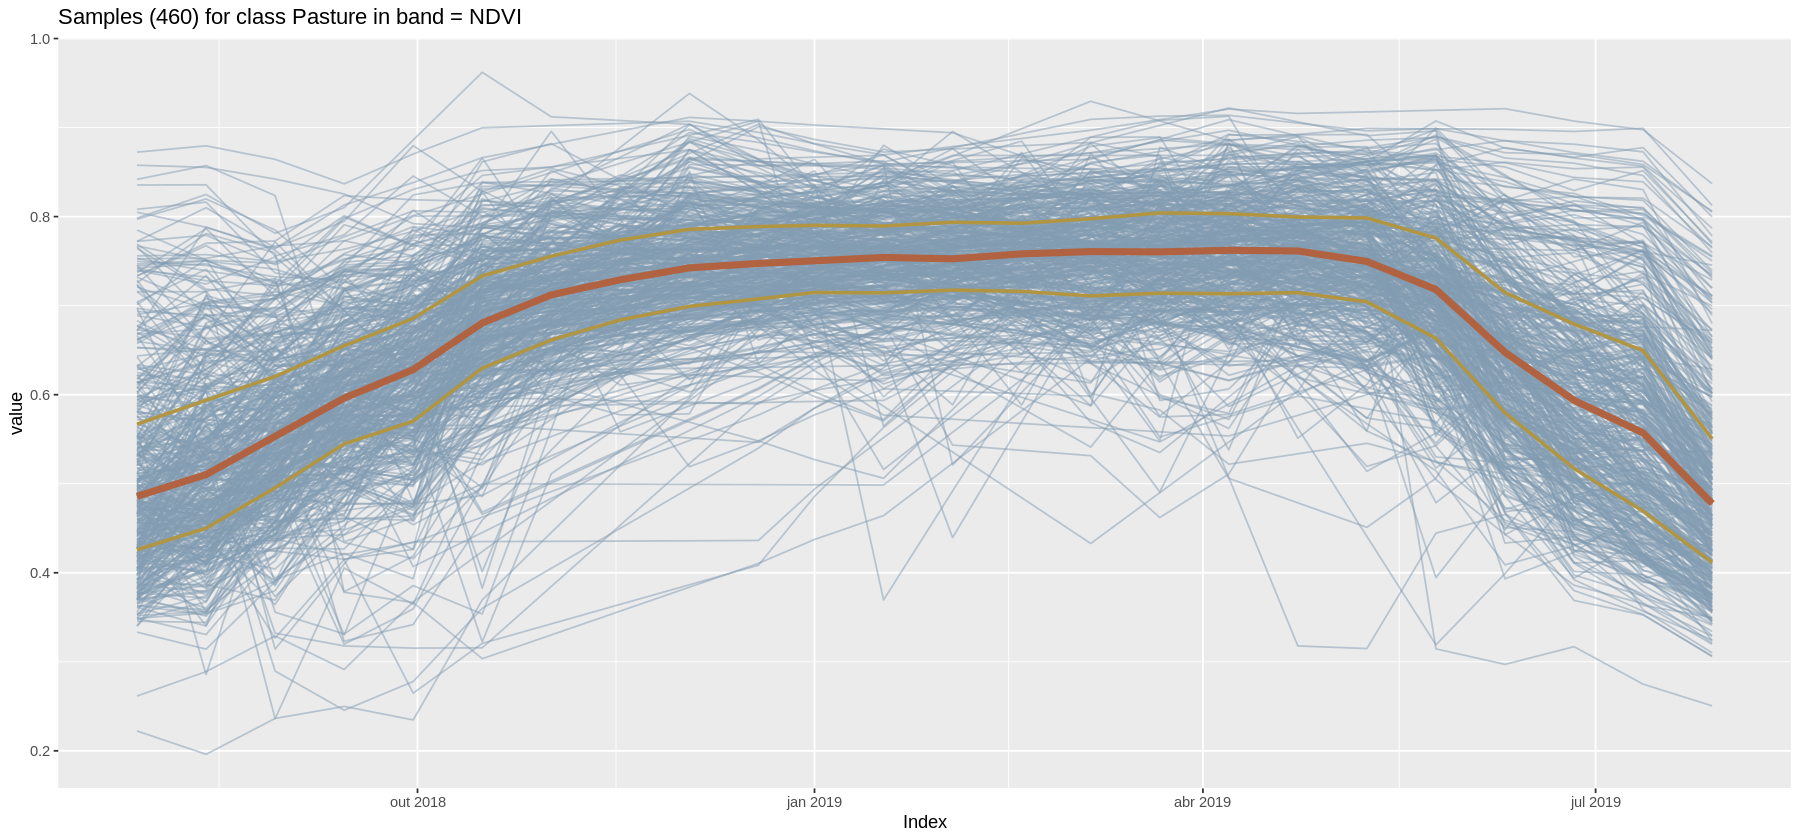

In [7]:
pasture <- dplyr::filter(samples, label == "Pasture")
options(repr.plot.width = 15, repr.plot.height = 7)
plot(sits_select(pasture, bands = "NDVI"))

In [8]:
length(pasture[[1]])

[1] 460

In [9]:
x <- pasture[2, ]
x

longitude latitude  start_date end_date   label   cube           
1 -64.66035 -10.34443 2018-07-28 2019-07-28 Pasture sentinel-077095
  time_series                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1 17740.0000, 17756.0000, 17772.0000, 17788.0000, 17804.0000, 17820.0000, 17836.0000, 17852.0000, 17868.0000, 17884.0000, 17897.0000, 17913.0000, 17929.0000, 17945.0000, 17961.0000, 17977.0000, 17993.0000, 18009.0000, 18025.0000, 18041.0000, 18057.0000, 18073.0000, 18089.0000, 18105.0000, 0.0539, 0.0497, 0.0533, 0.0445, 0.0407, 0.0471, 0.0446, 0.0420, 0.0394, 0.0369, 0.0343, 0.0317, 0.0209, 0.0243, 0.0278, 0.0309, 0.0340, 0.0326, 0.0311, 0.0317, 0.0332, 0.0345, 0.0298, 0.0435, 0.1026, 0.0824, 0.0737, 0.0628, 0.0543, 0.0574, 0.0565, 0.0556, 0.0547, 0.0538, 0.0529, 0.0520, 0.0566, 0.0542, 0.0517, 0.0519, 0.0521, 0.0437, 0.0352, 0.0444, 0.0521, 0.0491, 0.0423, 0.0698, 0.2444, 0.2413, 0.2689, 0.2798, 0.2834, 0.3427, 0.3289, 0.3151, 0.3013, 0.2875, 0.2737, 0.2598, 0.2362, 0.2324, 0.2285, 0.2402, 0.2519, 0.2720, 0.2922, 0.2702, 0.2433, 0.2668, 0.2743, 0.2551, 0.3003, 0.3539, 0.4192, 0.4917, 0.5159, 0.6260, 0.6002, 0.5744, 0.5485, 0.5227, 0.4969, 0.4710, 0.4348, 0.4228, 0.4108, 0.4299, 0.4491, 0.5142, 0.5794, 0.5130, 0.4345, 0.4822, 0.5067, 0.4086, 0.4664, 0.5465, 0.6040, 0.6831, 0.7201, 0.7531, 0.7469, 0.7406, 0.7343, 0.7280, 0.7217, 0.7154, 0.6974, 0.6921, 0.6868, 0.6933, 0.6998, 0.7563, 0.8128, 0.7573, 0.6925, 0.7253, 0.7632, 0.6193

In [10]:
y <- pasture[453, ]
y

longitude latitude  start_date end_date   label   cube           
1 -65.25389 -10.62983 2018-07-28 2019-07-28 Pasture sentinel-077095
  time_series                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1 17740.0000, 17756.0000, 17772.0000, 17788.0000, 17804.0000, 17820.0000, 17836.0000, 17852.0000, 17868.0000, 17884.0000, 17897.0000, 17913.0000, 17929.0000, 17945.0000, 17961.0000, 17977.0000, 17993.0000, 18009.0000, 18025.0000, 18041.0000, 18057.0000, 18073.0000, 18089.0000, 18105.0000, 0.0357, 0.0410, 0.0464, 0.0418, 0.0380, 0.0342, 0.0320, 0.0298, 0.0276, 0.0288, 0.0300, 0.0313, 0.0297, 0.0334, 0.0270, 0.0276, 0.0290, 0.0282, 0.0274, 0.0302, 0.0304, 0.0334, 0.0315, 0.0401, 0.0611, 0.0675, 0.0713, 0.0666, 0.0619, 0.0572, 0.0523, 0.0474, 0.0425, 0.0460, 0.0495, 0.0530, 0.0537, 0.0592, 0.0487, 0.0482, 0.0521, 0.0469, 0.0417, 0.0484, 0.0450, 0.0467, 0.0476, 0.0653, 0.2062, 0.2028, 0.2316, 0.2383, 0.2480, 0.2578, 0.2555, 0.2531, 0.2507, 0.2516, 0.2525, 0.2535, 0.2797, 0.2773, 0.2883, 0.2610, 0.2505, 0.2296, 0.2087, 0.2325, 0.2123, 0.2206, 0.2144, 0.2258, 0.3277, 0.3188, 0.3505, 0.3840, 0.4101, 0.4363, 0.4445, 0.4527, 0.4609, 0.4523, 0.4437, 0.4350, 0.4820, 0.4791, 0.5125, 0.4641, 0.4389, 0.4123, 0.3857, 0.4378, 0.4008, 0.4056, 0.4004, 0.3705, 0.5888, 0.5578, 0.5682, 0.6109, 0.6449, 0.6789, 0.7004, 0.7219, 0.7435, 0.7267, 0.7099, 0.6931, 0.7195, 0.6997, 0.7508, 0.7277, 0.7010, 0.7024, 0.7038, 0.7093, 0.6975, 0.6906, 0.6872, 0.6063

In [11]:
X <- as.data.frame(x$time_series)[["NDVI"]]
Y <- as.data.frame(y$time_series)[["NDVI"]]

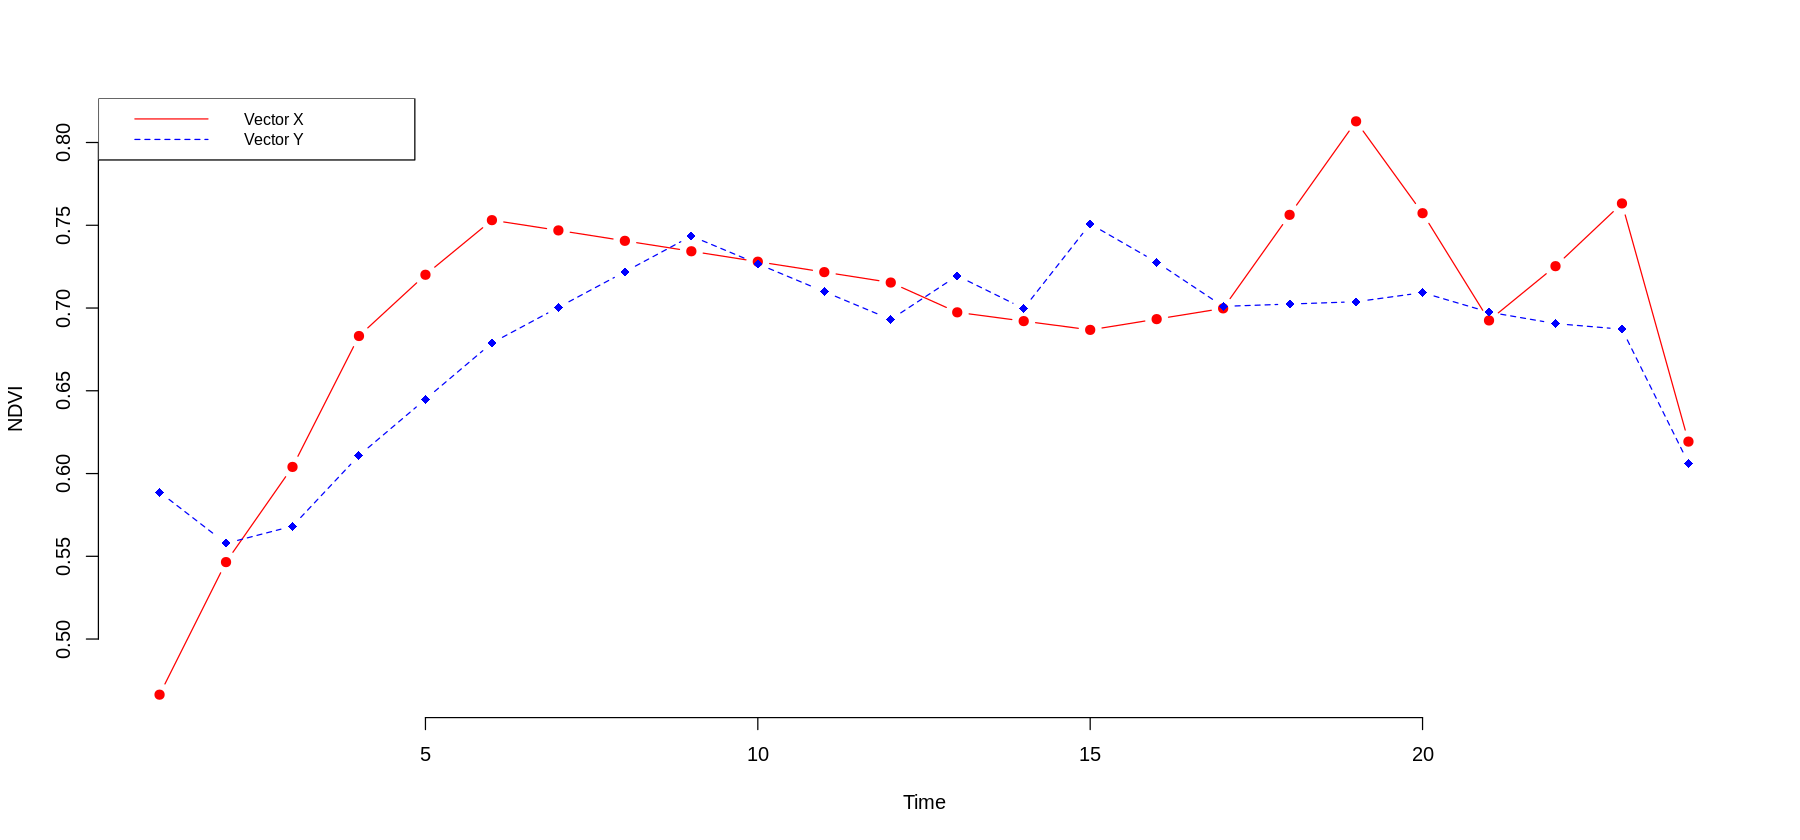

In [12]:
plot(x = 1:length(X), y = X, type = "b", frame = FALSE, pch = 19, col = "red", xlab = "Time", ylab = "NDVI")
# Add a second line
lines(x = 1:length(Y), y = Y, pch = 18, col = "blue", type = "b", lty = 2)
# Add a legend to the plot
legend("topleft", legend=c("Vector X", "Vector Y"), col=c("red", "blue"), lty = 1:2, cex=0.8)

In [13]:
X

[1] 0.4664 0.5465 0.6040 0.6831 0.7201 0.7531 0.7469 0.7406 0.7343 0.7280
[11] 0.7217 0.7154 0.6974 0.6921 0.6868 0.6933 0.6998 0.7563 0.8128 0.7573
[21] 0.6925 0.7253 0.7632 0.6193

In [14]:
Y

[1] 0.5888 0.5578 0.5682 0.6109 0.6449 0.6789 0.7004 0.7219 0.7435 0.7267
[11] 0.7099 0.6931 0.7195 0.6997 0.7508 0.7277 0.7010 0.7024 0.7038 0.7093
[21] 0.6975 0.6906 0.6872 0.6063

In [15]:
# Euclidean distance
TSdist::EuclideanDistance(X, Y)

[1] 0.2570811

In [16]:
TSdist::DTWDistance(X, Y)

[1] 0.6629

In [17]:
samples_filtered <- sits_whittaker(
    samples,
    lambda = 0.4,
    bands_suffix = ""
)
rows <- sample(nrow(samples_filtered), replace = FALSE)
samples_filtered <- samples_filtered[rows, ]
dt <- sample(nrow(samples_filtered), nrow(samples_filtered) * 0.7, replace = FALSE)
train <- samples_filtered[dt,]
test <- samples_filtered[-dt,]
sample <- test[sample(nrow(test), 1), ]
label_ <- sample$label
sample$label <- "Unknown"

print(paste("Trainig data set =", nrow(train), "samples"))
print(paste("Testing data set =", nrow(test), "samples"))
print(paste("Sample to test =", 1, "samples"))

[1] "Trainig data set = 841 samples"
[1] "Testing data set = 361 samples"
[1] "Sample to test = 1 samples"


In [19]:
arch <- sits_TempCNN(
    cnn_layers = c(64, 128, 256),
    cnn_kernels = c(9, 9, 9),
    cnn_activation = 'relu',
    cnn_L2_rate = 1e-06,
    cnn_dropout_rates = c(0.4, 0.6, 0.8),
    epochs = 100,
    batch_size = 128,
    validation_split = 0.2,
    verbose = 2,
    optimizer = keras::optimizer_adam()
)

In [20]:
color.label <- function(label = "") {
    colors <- list(
        "Pasture" = "#ff8828",
        "Forest" = "#005500",
        "NatNonForest" = "#0fc80f",
        "Deforestation" = "#ff5f4c",
        "clean" = "green",
        "analyze" = "yellow",
        "remove" = "red"
    )
    return(colors[[label]])
}
group <- dplyr::group_by(samples, label)
agregation <- dplyr::summarise(group, n = n(), .groups = "drop_last")
colors <- c()
for (i in 1:nrow(agregation)) {
    label <- agregation$label[[i]]
    colors <- append(colors, color.label(label))
}
labels_summary <- dplyr::mutate(
    agregation,
    percent = n/sum(n),
    color = colors
)
labels_summary <- data.frame(labels_summary)
labels_summary <- labels_summary[order(labels_summary$percent, decreasing = TRUE),]
labels_summary

label         n   percent   color  
4 Pasture       460 0.3826955 #ff8828
2 Forest        414 0.3444260 #005500
3 NatNonForest  171 0.1422629 #0fc80f
1 Deforestation 157 0.1306156 #ff5f4c

In [21]:
train_ <- as.data.frame(list())
for (label_ in labels_summary$label) {
    for (i in 1:2) {
        train_ <- rbind(train_, dplyr::filter(train, label == label_)[i, ])
    }
}
test_ <- as.data.frame(list())
for (label_ in labels_summary$label) {
    for (i in 1:2) {
        test_ <- rbind(train_, dplyr::filter(test, label == label_)[i, ])
    }
}

In [22]:
# train a machine learning model using tempCNN
# Modificar os parâmetros da rede para a ResNET
# tCNN_model <- sits_train(train, arch)
tCNN_model <- sits_train(train_, arch)

`geom_smooth()` using formula 'y ~ x'



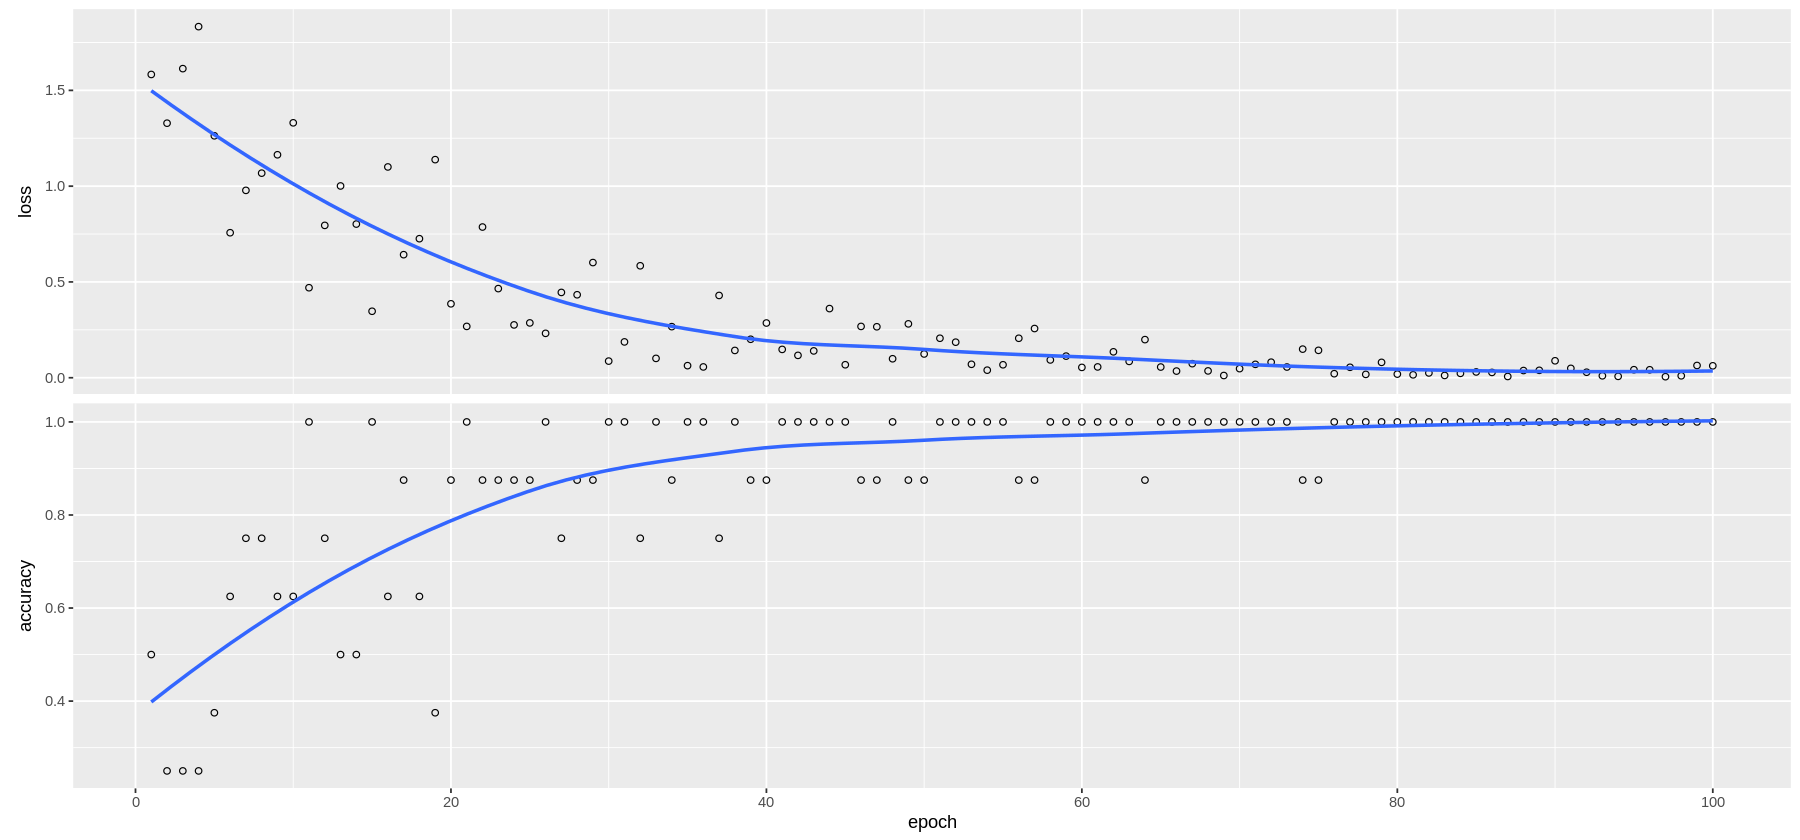

In [23]:
options(repr.plot.width = 15, repr.plot.height = 7)
plot(tCNN_model)

In [24]:
# Classify using TempCNN model and plot the result
class <- test %>% sits_classify(tCNN_model)
results <- sits_accuracy(class)
results

Confusion Matrix and Statistics

               Reference
Prediction      Pasture NatNonForest Forest Deforestation
  Pasture           133            4      3            19
  NatNonForest        4           21     21            10
  Forest              0           20    105            14
  Deforestation       1            0      0             6

Overall Statistics
                           
 Accuracy : 0.7341         
   95% CI : (0.6853, 0.779)
                           
    Kappa : 0.6043         

Statistics by Class:

                          Class: Pasture Class: NatNonForest Class: Forest
Prod Acc (Sensitivity)            0.9638              0.4667        0.8140
Specificity                       0.8834              0.8892        0.8534
User Acc (Pos Pred Value)         0.8365              0.3750        0.7554
Neg Pred Value                    0.9752              0.9213        0.8919
                          Class: Deforestation
Prod Acc (Sensitivity)                  0.1224


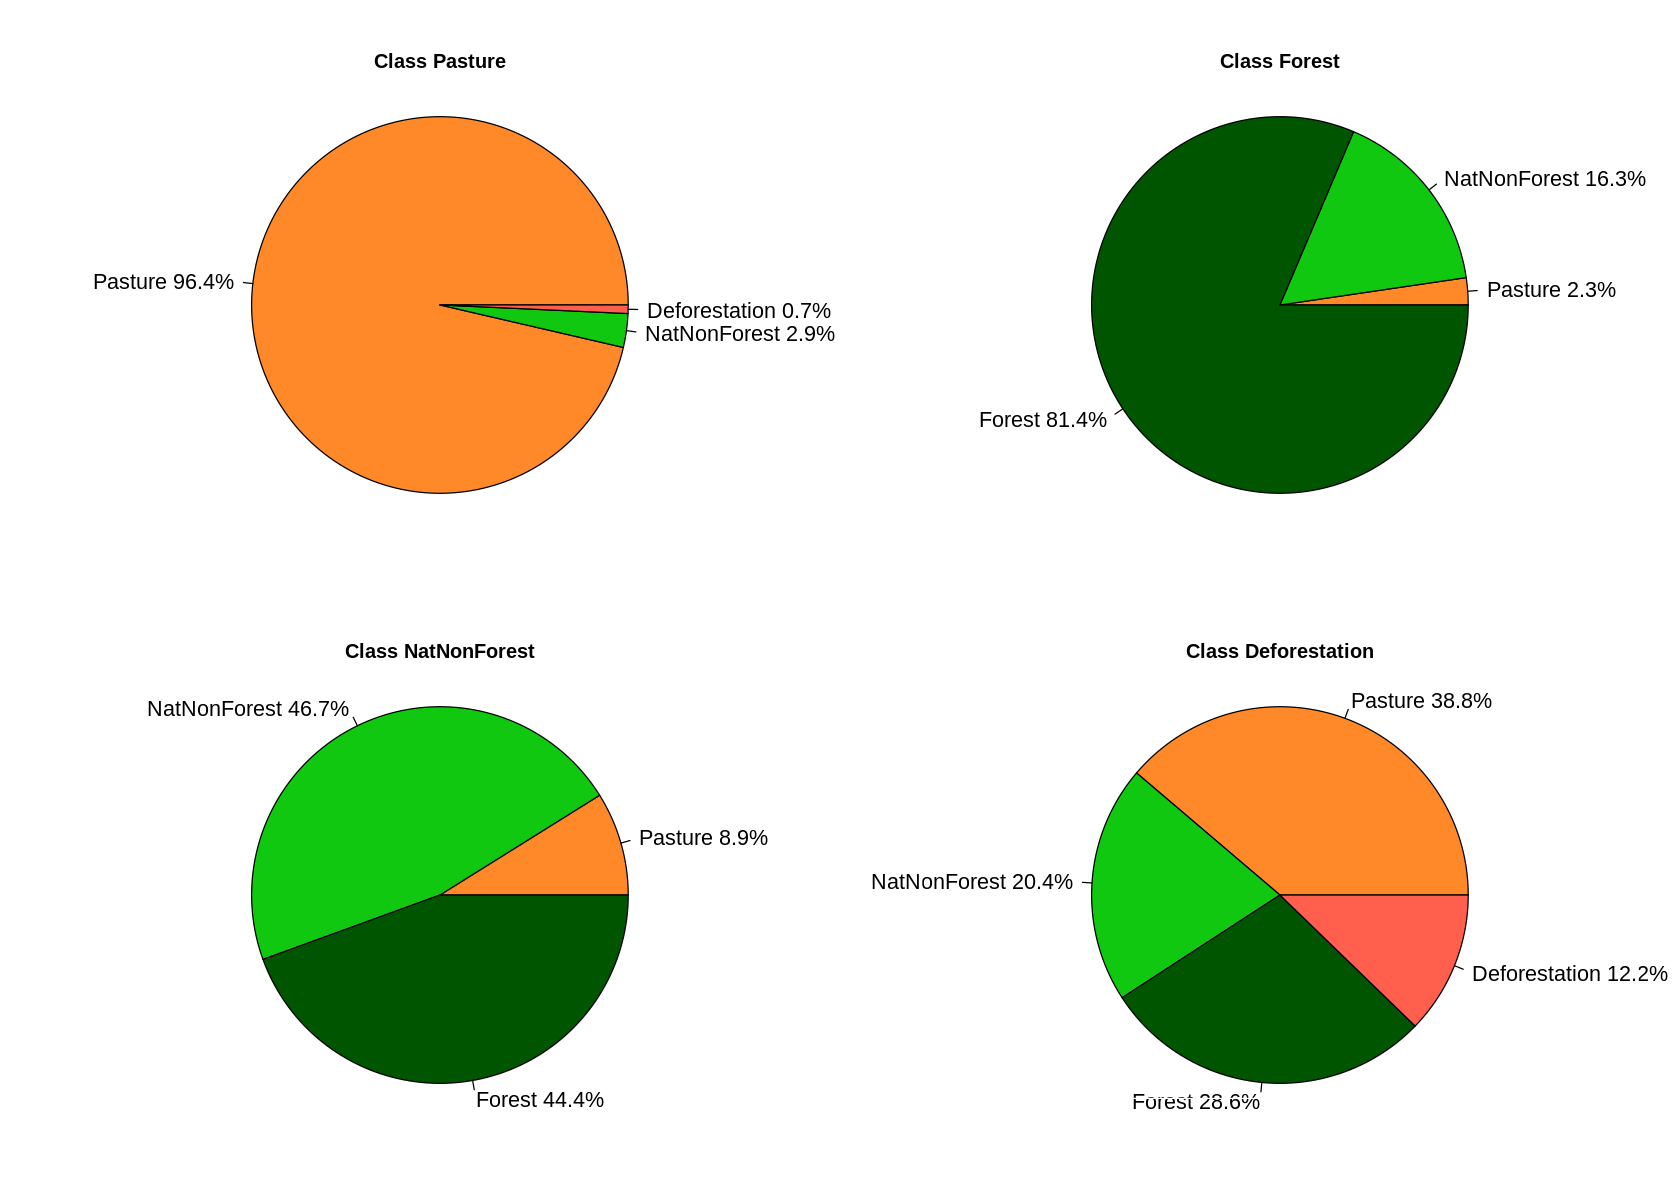

In [25]:
options(repr.plot.width = 14, repr.plot.height = 10)
par(mfrow = c(2,2), oma = c(0,0,1,0), tck = 0)
confusion <- as.data.frame(results$table)
for (i in 1:length(labels_summary$label)) {
    filtered <- dplyr::filter(confusion, Reference == labels_summary[i, ]$label)
    colors <- c()
    for (i in 1:length(filtered$Prediction)) {
        label <- as.character(filtered$Prediction[[i]])
        colors <- append(colors, color.label(label))
    }
    mutation_ <- dplyr::mutate(filtered, percent = Freq/sum(Freq), color = colors)
    mutation_ <- dplyr::filter(mutation_, percent > 0)
    pie(
        mutation_$percent,
        paste(mutation_$Prediction, " ", round((mutation_$percent * 100), 1), "%", sep=""),
        col = mutation_$color,
        main = paste("Class", mutation_$Reference[[1]]),
        cex = 1.3,
        radius = 1
    )
}
box(col = "white")

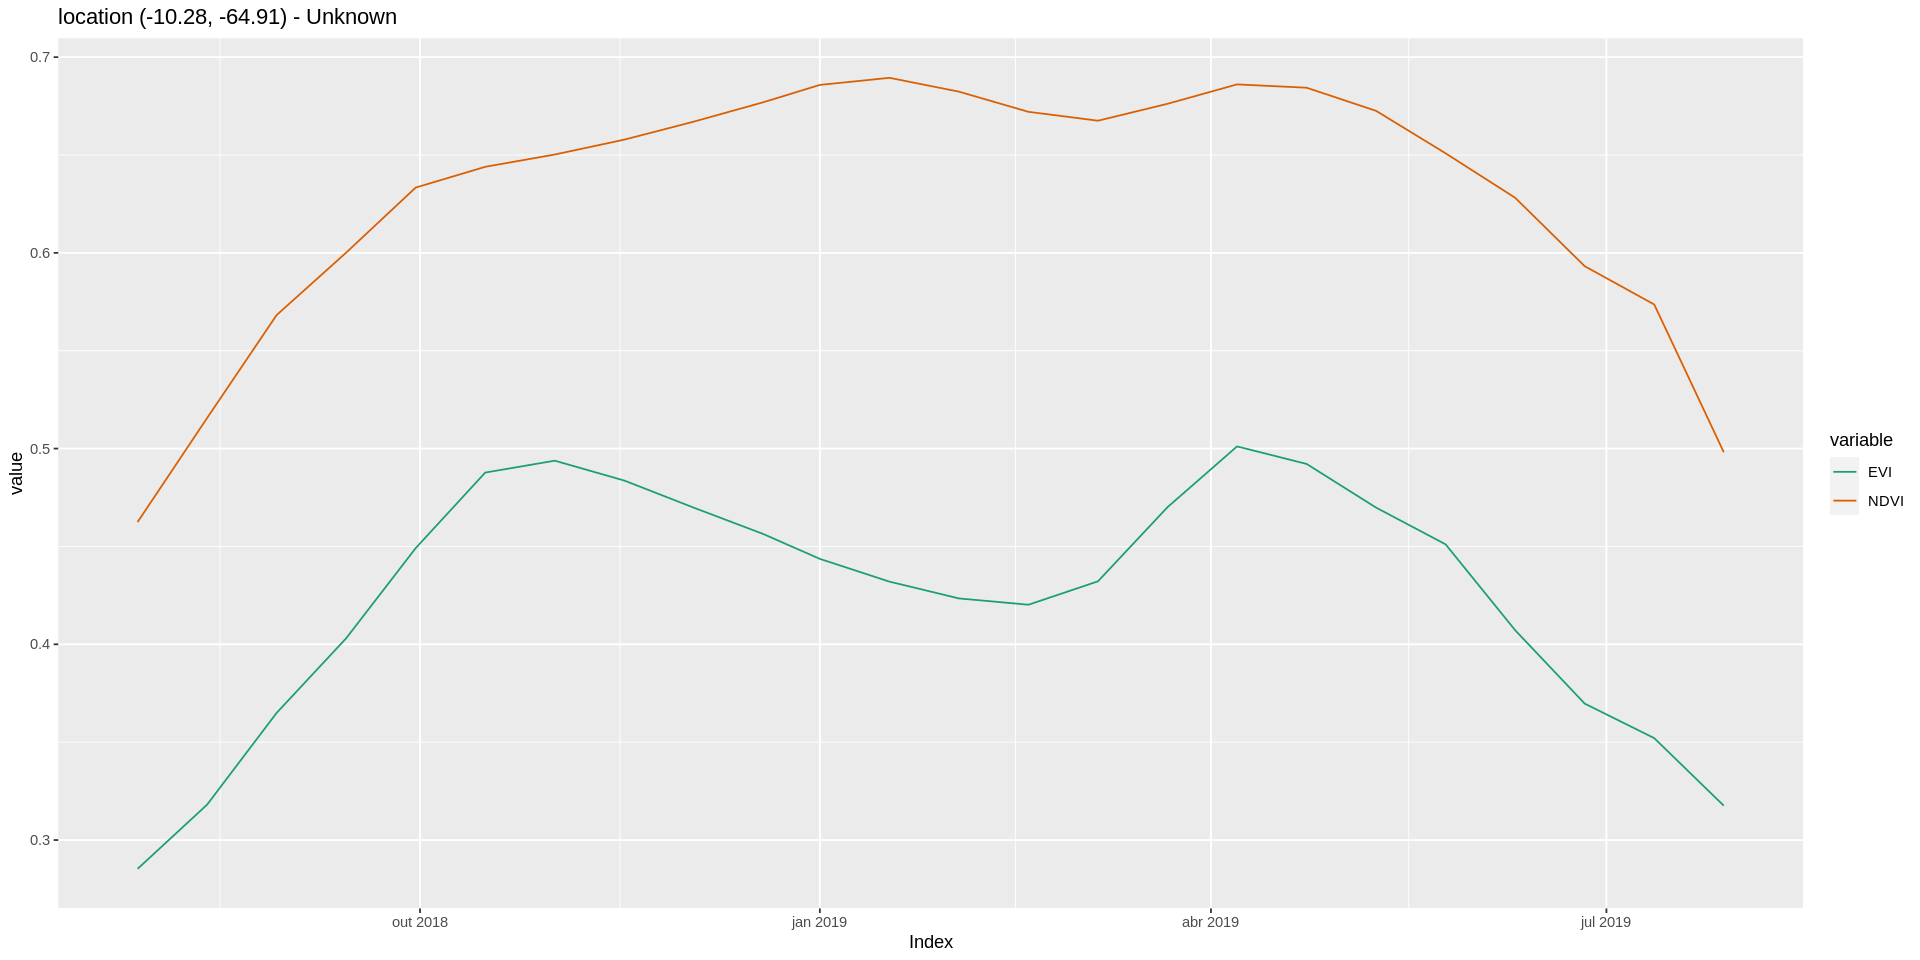

In [26]:
options(repr.plot.width = 16, repr.plot.height = 8)
plot(sits_select(sample, bands = c("NDVI", "EVI")))

In [27]:
prediction <- sample %>% sits_classify(tCNN_model)
dplyr::select(prediction, -time_series)

longitude latitude  start_date end_date   label   cube           
1 -64.90884 -10.27966 2018-07-28 2019-07-28 Unknown sentinel-077095
  predicted                                                                                                                                               
1 17740               , 18105               , Pasture             , 0.000302898522932082, 0.000129818494315259, 0.00703135738149285 , 0.992535948753357

In [28]:
prediction <- as.data.frame(prediction$predicted)
prediction$class
label_
probs <- as.data.frame(prediction$probs)
probs

[1] "Pasture"

[1] "Deforestation"

Deforestation Forest       NatNonForest Pasture  
1 0.0003028985  0.0001298185 0.007031357  0.9925359

In [29]:
dt <- sample(nrow(test), 5, replace = FALSE)
dt

[1] 307 118 117  54 305

In [30]:
sample_test_ <- test[dt, ]
dplyr::select(sample_test_, -time_series)

longitude latitude  start_date end_date   label        cube           
1 -64.57682 -10.47079 2018-07-28 2019-07-28 Forest       sentinel-077095
2 -65.17835 -10.03628 2018-07-28 2019-07-28 Pasture      sentinel-077095
3 -63.89557 -10.65170 2018-07-28 2019-07-28 NatNonForest sentinel-077095
4 -64.78840 -10.93395 2018-07-28 2019-07-28 Forest       sentinel-077095
5 -64.75751 -10.39823 2018-07-28 2019-07-28 Pasture      sentinel-077095

In [31]:
prediction <- sample_test_ %>% sits_classify(tCNN_model)
dplyr::select(prediction, -time_series)

longitude latitude  start_date end_date   label        cube           
1 -64.57682 -10.47079 2018-07-28 2019-07-28 Forest       sentinel-077095
2 -65.17835 -10.03628 2018-07-28 2019-07-28 Pasture      sentinel-077095
3 -63.89557 -10.65170 2018-07-28 2019-07-28 NatNonForest sentinel-077095
4 -64.78840 -10.93395 2018-07-28 2019-07-28 Forest       sentinel-077095
5 -64.75751 -10.39823 2018-07-28 2019-07-28 Pasture      sentinel-077095
  predicted                                                                                                                                               
1 17740               , 18105               , Forest              , 0.000416638591559604, 0.99344539642334    , 0.00607791403308511 , 6.0032954934286e-05 
2 17740               , 18105               , Pasture             , 0.000451747881015763, 0.000506307696923614, 0.0244330931454897  , 0.974608778953552   
3 17740              , 18105              , NatNonForest       , 0.00450353091582656, 0.0101058082655072 , 0.716812133789062  , 0.268578499555588         
4 17740               , 18105               , Forest              , 1.39913772727596e-05, 0.999974608421326   , 1.12783200165723e-05, 1.3640820384353e-07 
5 17740               , 18105               , Pasture             , 0.000565607741009444, 0.00049777893582359 , 0.0313095897436142  , 0.967626988887787

In [32]:
toy_case <- list()
for (i in 1:length(prediction$predicted)) {
    probs <- as.data.frame(as.data.frame(prediction[i, ]$predicted)$probs)
    tryCatch(
        expr = {
            toy_case[["True_Label"]] <- append(toy_case[["True_Label"]], prediction[i, ]$label)
            toy_case[["Predicition"]] <- append(toy_case[["Predicition"]], as.data.frame(prediction[i, ]$predicted)$class)
        },
        error = function(e){
            toy_case[["True_Label"]] <- c()
            toy_case[["True_Label"]] <- append(toy_case[["True_Label"]], prediction[i, ]$label)
            
            toy_case[["Prediction"]] <- c()
            toy_case[["Prediction"]] <- append(toy_case[["Prediction"]], as.data.frame(prediction[i, ]$predicted)$class)
        }
    )
    for (label in labels_summary$label) {
        tryCatch(
            expr = {
                toy_case[[label]] <- append(toy_case[[label]], probs[[label]])
            },
            error = function(e){ 
                toy_case[[label]] <- c()
                toy_case[[label]] <- append(toy_case[[label]], probs[[label]])
            }
        )
    }
}
toy_case <- as.data.frame(toy_case)
toy_case

True_Label   Predicition  Pasture      Forest       NatNonForest
1 Forest       Forest       6.003295e-05 0.9934453964 6.077914e-03
2 Pasture      Pasture      9.746088e-01 0.0005063077 2.443309e-02
3 NatNonForest NatNonForest 2.685785e-01 0.0101058083 7.168121e-01
4 Forest       Forest       1.364082e-07 0.9999746084 1.127832e-05
5 Pasture      Pasture      9.676270e-01 0.0004977789 3.130959e-02
  Deforestation
1 4.166386e-04 
2 4.517479e-04 
3 4.503531e-03 
4 1.399138e-05 
5 5.656077e-04

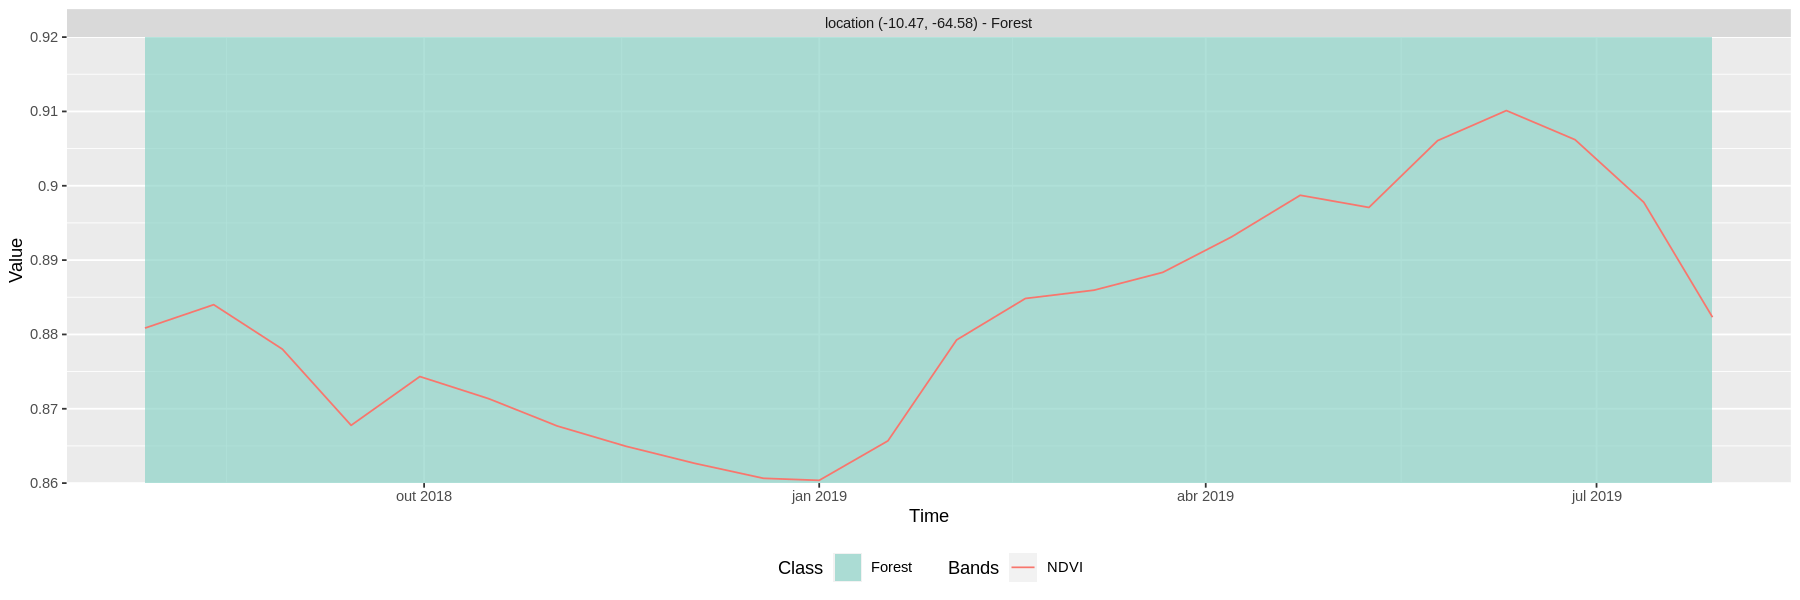

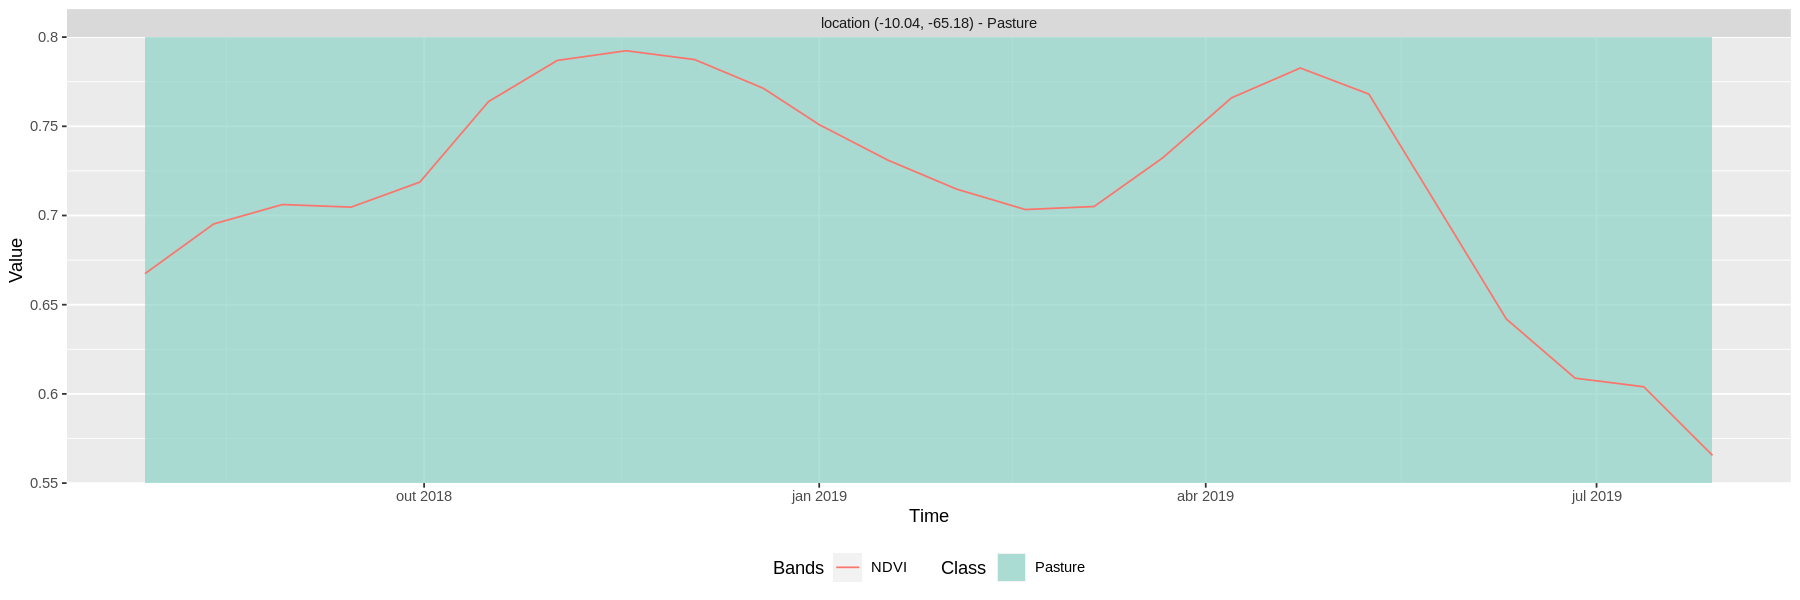

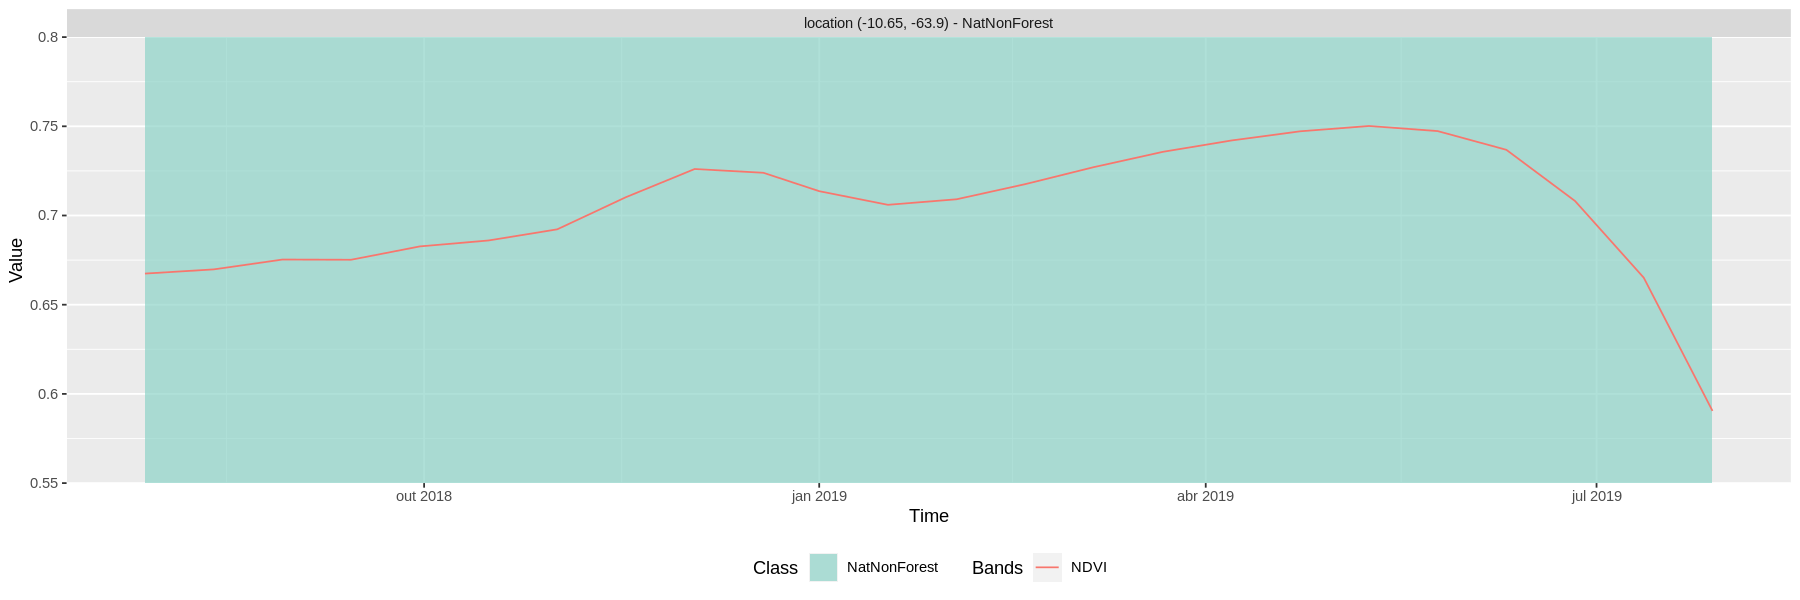

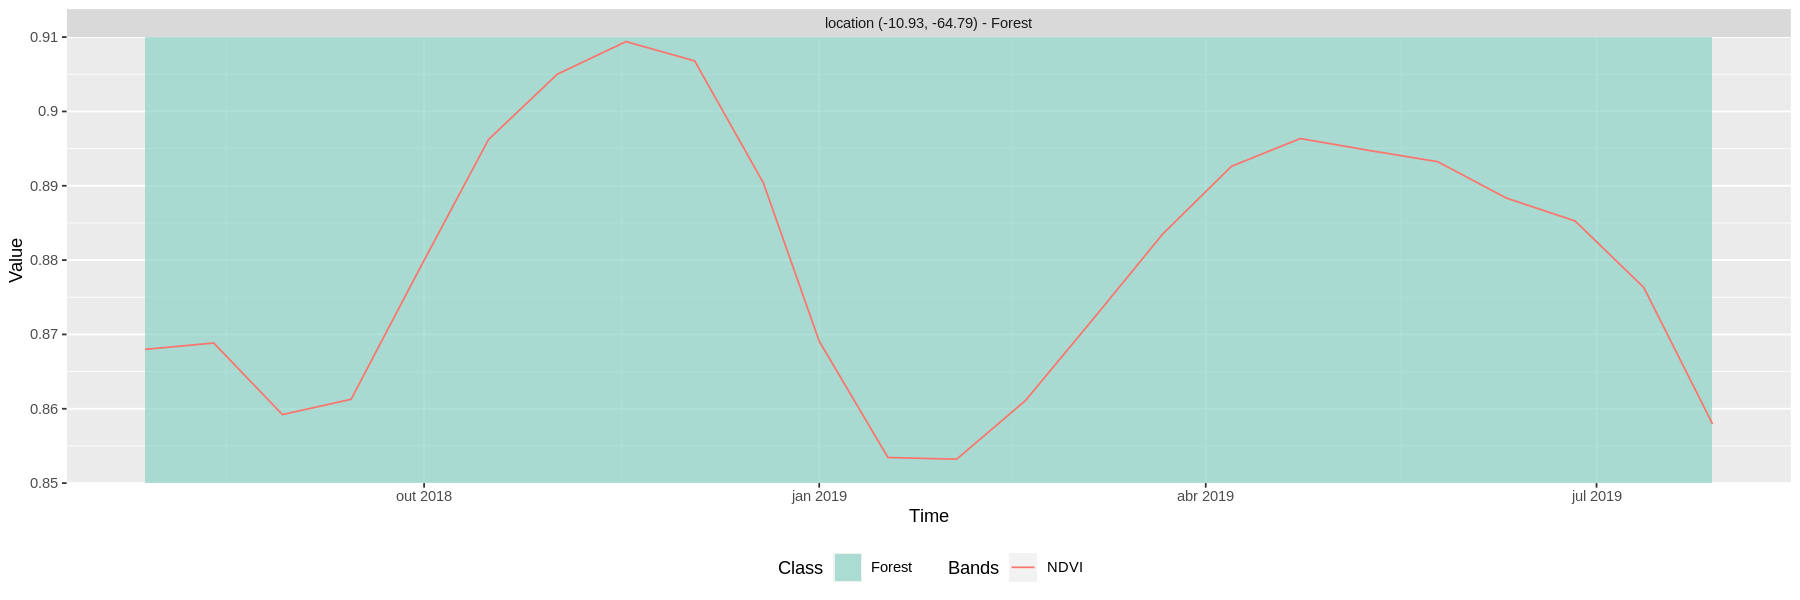

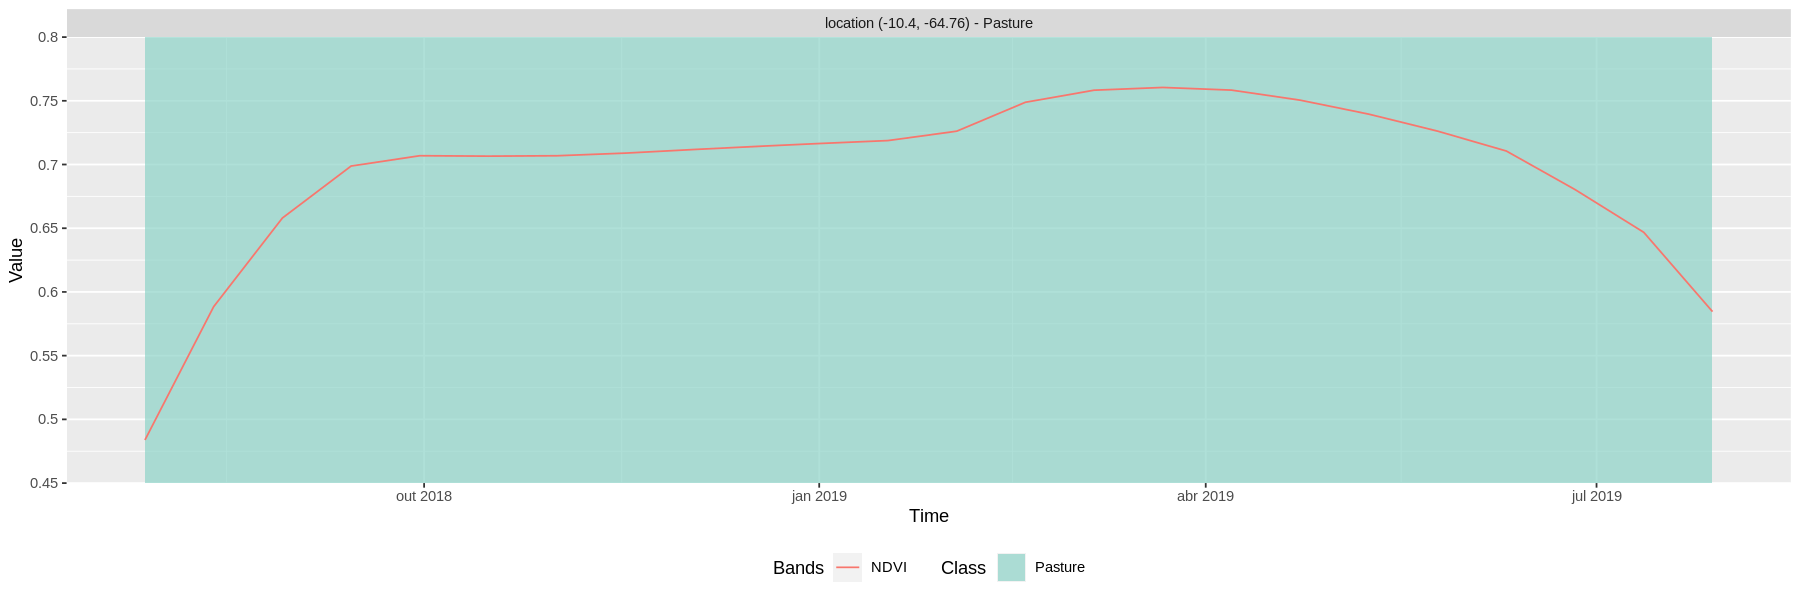

In [33]:
options(repr.plot.width = 15, repr.plot.height = 5)
plot(prediction)

In [32]:
sits_method <- sits::sits_xgboost(verbose = FALSE)

In [35]:
# Get samples of deforestation.
samples_tb <- samples %>% dplyr::mutate(sample_id = seq_len(nrow(.)))

In [36]:
sits_bands(samples_tb)

[1] "B02"  "B04"  "B08"  "EVI"  "NDVI"

In [40]:
# Get the labels used in the samples.
reference_labels <- samples_tb %>% 
    dplyr::pull(label) %>% 
    unique() %>%
    sort() %>% 
    magrittr::set_names(seq_len(length(.)))
reference_labels

1               2               3               4 
"Deforestation"        "Forest"  "NatNonForest"       "Pasture"

In [42]:
# Initial number of labels to be taken from each label.
n_labelled <- 3
# Number of labels to be selected on each iteration.
n_samples <- length(reference_labels) * 3
# Number of iterations
n_iterations <- 10
# Number of experiments
n_experiments <- 30
# Get an initial set of samples 
labelled_samples <- samples_tb %>%
  dplyr::group_by(label) %>% 
  dplyr::sample_n(size = n_labelled) %>%
  dplyr::ungroup()
labelled_samples %>% dplyr::select(-time_series)

longitude latitude  start_date end_date   label         cube           
1  -64.84594 -10.16775 2018-07-28 2019-07-28 Deforestation sentinel-077095
2  -64.71480 -10.17930 2018-07-28 2019-07-28 Deforestation sentinel-077095
3  -64.74308 -10.28177 2018-07-28 2019-07-28 Deforestation sentinel-077095
4  -64.00849 -10.19943 2018-07-28 2019-07-28 Forest        sentinel-077095
5  -65.06016 -10.84140 2018-07-28 2019-07-28 Forest        sentinel-077095
6  -65.18272 -10.15745 2018-07-28 2019-07-28 Forest        sentinel-077095
7  -64.90071 -10.88762 2018-07-28 2019-07-28 NatNonForest  sentinel-077095
8  -63.79685 -10.74526 2018-07-28 2019-07-28 NatNonForest  sentinel-077095
9  -65.08437 -10.92963 2018-07-28 2019-07-28 NatNonForest  sentinel-077095
10 -64.12404 -10.46904 2018-07-28 2019-07-28 Pasture       sentinel-077095
11 -64.68766 -10.29669 2018-07-28 2019-07-28 Pasture       sentinel-077095
12 -64.59779 -10.28277 2018-07-28 2019-07-28 Pasture       sentinel-077095
   sample_id
1   804     
2    19     
3  1006     
4   200     
5   869     
6  1046     
7  1019     
8   432     
9  1011     
10  555     
11  490     
12  502

In [43]:
accuracy_tb <- tibble::tibble()

In [44]:
get_acc <- function(conf_mat) {
    overall_accuracy  <- conf_mat$overall["Accuracy"]
    by_class <- conf_mat[["byClass"]]
    f1_score <- by_class[, "F1"]
    prod_acc <- by_class[, "Pos Pred Value"]
    user_acc <- by_class[, "Sensitivity"]
    class_names <- stringr::str_sub(rownames(by_class), 8)
    return(
        tibble::tibble(class = class_names, metric = "f1", accuracy = f1_score) %>%
            dplyr::bind_rows(
                tibble::tibble(class = class_names, metric = "prod_acc", accuracy = prod_acc)
            ) %>%
                dplyr::bind_rows(
                    tibble::tibble(class = class_names, metric = "user_acc", accuracy = user_acc)
                ) %>%
                    dplyr::add_row(class = "overall", metric = "accuracy", accuracy = overall_accuracy)
    )
}

In [45]:
iteration <- function(training_samples, samples_tb, sits_method, reference_labels) {
    
    classification_model  <- sits::sits_train(training_samples, ml_method = arch)
    
    prediction_fct <- samples_tb %>% 
        dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>%
            sits::sits_classify(ml_model = classification_model) %>% 
                dplyr::pull(predicted) %>%
                    purrr::map_chr(magrittr::extract("class")) %>%
                        factor(levels = reference_labels)
    
    reference_fct <- samples_tb %>%
        dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>%
            pull(label) %>% 
                factor(levels = reference_labels)
    
    return(
        caret::confusionMatrix(data = prediction_fct, reference = reference_fct) %>%
            get_acc() %>% 
                dplyr::mutate(n_samples = nrow(training_samples))
    )
}

In [52]:
experiment <- function(x, labelled_samples, n_samples, sits_method){

    #---- Test without active learning ----
    training_samples <- labelled_samples
    for (i in 1:n_iterations) {
    
        new_samples <- samples_tb %>% 
            dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>% 
                dplyr::sample_n(size = n_samples)
    
        training_samples <- training_samples %>% 
            dplyr::bind_rows(new_samples) %>% 
                magrittr::set_class(class(sits::cerrado_2classes))
     
        acc_iter <- iteration(training_samples, samples_tb, sits_method, reference_labels) %>% 
            dplyr::mutate(type = "Without AL", iteration = i)
    
        accuracy_tb <- accuracy_tb %>% 
            dplyr::bind_rows(acc_iter)
    }
    
    #---- Test using AL random sampling ----
    training_samples <- labelled_samples %>% 
        magrittr::set_class(class(sits::cerrado_2classes))
    for (i in 1:n_iterations) {
        
        unlabelled_tb <- samples_tb %>% 
            dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>% 
                dplyr::mutate(label = NA)
  
        # Use AL random sampling to choose the samples to be sent to the oracle. 
        oracle_samples <- training_samples %>% 
            dplyr::bind_rows(unlabelled_tb) %>% 
                al_random_sampling(sits_method = sits_method, multicores = 1) %>% 
                    dplyr::filter(sample_id %in% unlabelled_tb$sample_id) %>% 
                        dplyr::arrange(dplyr::desc(entropy)) %>% 
                            dplyr::slice_head(n = n_samples) %>% 
                                dplyr::select(-entropy, -least_conf, -margin_conf, -ratio_conf, -new_label)
    
        # Get the true labels from the oracle
        oracle_samples <- oracle_samples %>% 
            dplyr::left_join(y = samples_tb %>% 
                dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>% 
                    dplyr::select(true_label = label, sample_id), by = "sample_id") %>% 
                        dplyr::mutate(label = true_label) %>%
                              dplyr::select(-true_label)
                    
        # Add the oracle samples to the training set.
        training_samples <- training_samples %>% 
            dplyr::bind_rows(oracle_samples) %>% 
                magrittr::set_class(class(sits::cerrado_2classes))
    
        # Do the classification and estimate the accuracy.
        acc_iter <- iteration(training_samples, samples_tb, sits_method, reference_labels) %>% 
            dplyr::mutate(type = "AL Random Sampling", iteration = i)
    
        accuracy_tb <- accuracy_tb %>% 
            dplyr::bind_rows(acc_iter)
    }
    
    return(
        accuracy_tb %>% 
            dplyr::mutate(experiment = x)
    )
}

In [ ]:
accuracy_lst <- parallel::mclapply(
    1:n_experiments,
    experiment, 
    labelled_samples = labelled_samples, 
    n_samples = n_samples,
    sits_method = arch,
    mc.cores = 1
)

In [51]:
save_file.tb(accuracy_lst, file = "data/output/accuracy_lst", "rda")

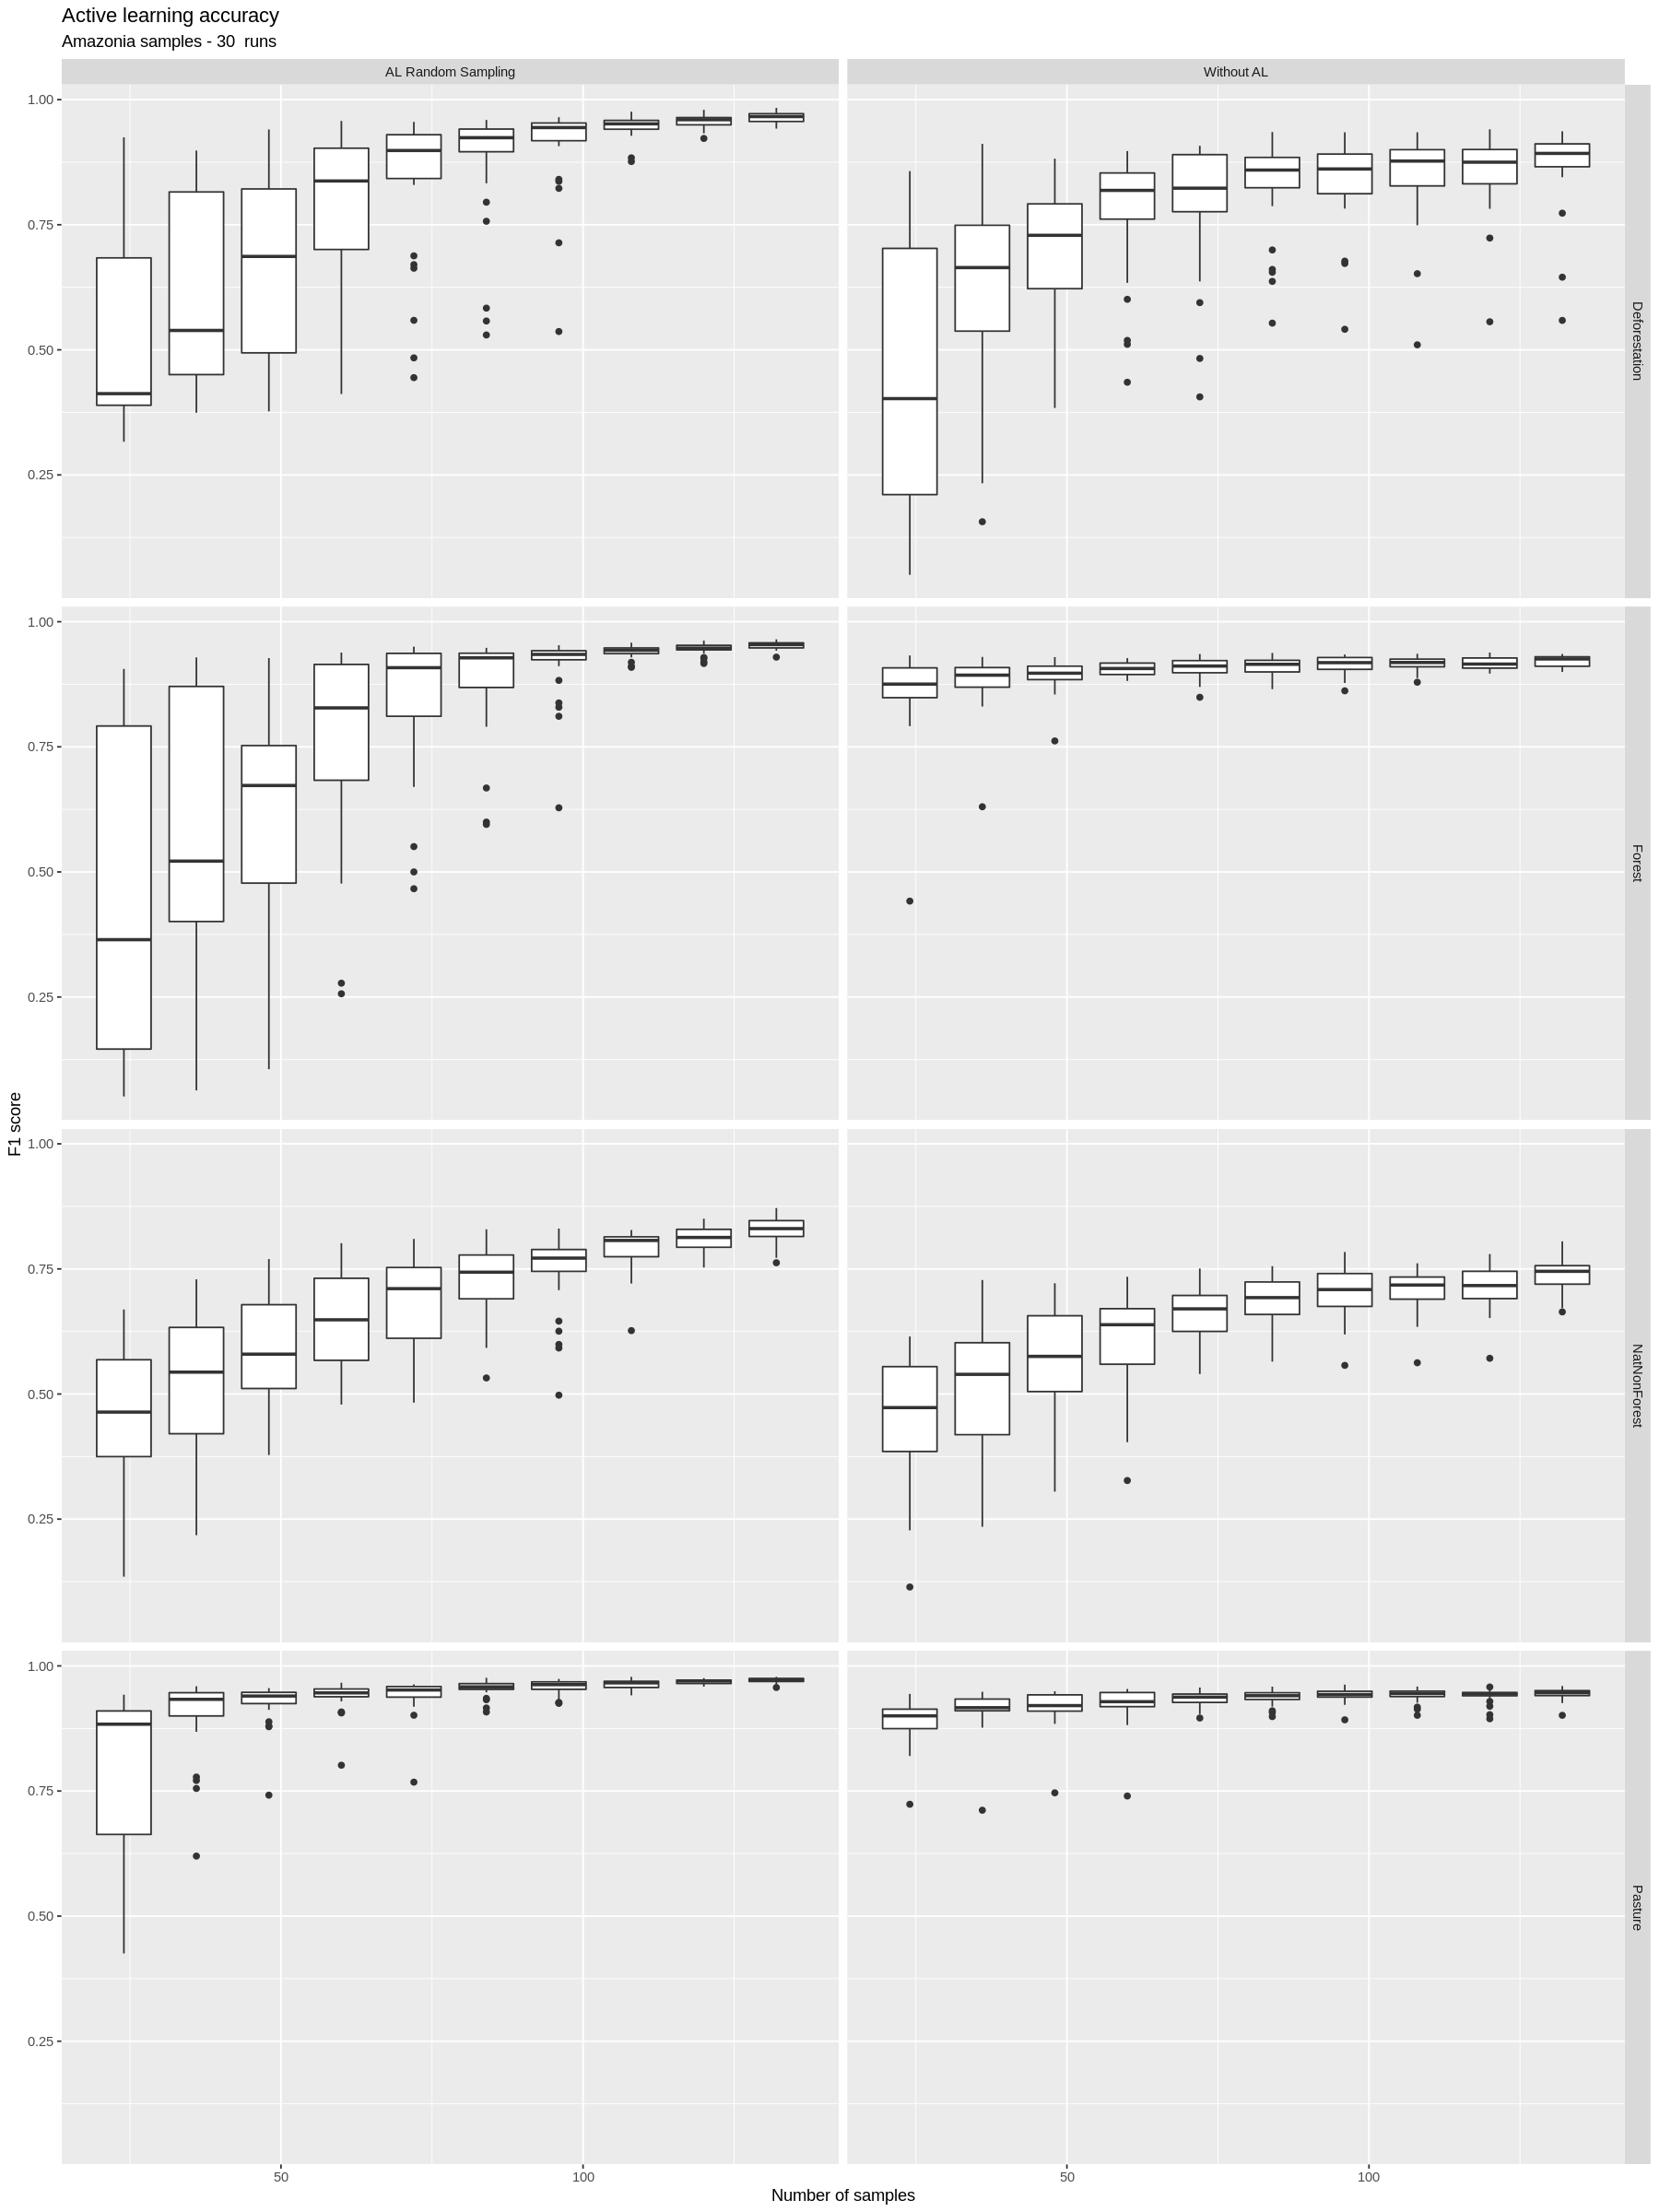

In [52]:
options(repr.plot.width = 15, repr.plot.height = 20)
accuracy_lst %>% 
  dplyr::bind_rows() %>% 
  dplyr::filter(metric == "f1") %>%
  ggplot2::ggplot() + 
  ggplot2::geom_boxplot(ggplot2::aes(x = n_samples,
                                     y = accuracy,
                                     group = n_samples)) +
  ggplot2::facet_grid(cols = dplyr::vars(type),
                      rows = dplyr::vars(class)) +
  ggplot2::labs(title = "Active learning accuracy",
                subtitle = paste("Amazonia samples",
                                 paste(n_experiments, " runs"),
                                 sep = " - ")) +
  ggplot2::xlab("Number of samples") + 
  ggplot2::ylab("F1 score")

ggplot2::ggsave(filename = "./comparison_deforestation.png",
                width = 297,
                height = 210,
                units = "mm")